### Dimensions

In [1]:
from dimensions import DimensionsQuery

### Set the Query

To set you query you need 3 things:

1. The type of search. Could be:
* Publications
* Datasets
* Grants
* Patents
* Clinical trials
* Policy documents
* Reports
* Source titles
* Researchers
* Organizations

2. The Topic: Use any topic for your search. You can also use boolean operations such as 'and' or 'or'

3. Where: To limitate your search you can use the where to limitate by year, citations, author, and many others.

4. Columns of the resulting query: Which are the columns that we want to return from the query. Example:

| Fieldset                     | Fields                                  |
|------------------------------|-----------------------------------------|
| extras                       | altmetric date doi funders open_access pmcid pmid relative_citation_ratio research_org_cities research_org_countries research_org_country_names research_org_state_codes research_org_state_names research_orgs researchers times_cited |
| categories                   | category_bra category_for category_hra category_hrcs_hc category_hrcs_rac category_icrp_cso category_icrp_ct category_rcdc category_sdg category_uoa |
| book                         | book_doi book_series_title book_title   |
| basics                       | authors id issue journal pages title type volume year |


For more information check the [Publication's documentation](https://docs.dimensions.ai/dsl/datasource-publications.html)



In [2]:
# Search Query:
SEARCH = 'publications'
TOPIC = 'machine learning and healthcare'

YEAR = [2020, 2023]
WHERE = f'year in [{YEAR[0]}:{YEAR[1]}] and times_cited > 10'

COLUMNS = 'id+title+authors+pages+type+volume+year+journal+issue+times_cited'


### Search:

In [3]:
# Create an instance of DimensionsQuery
dimensions_query = DimensionsQuery(topic=TOPIC, where=WHERE, return_cols=COLUMNS, search=SEARCH)

# Run the query
response = dimensions_query.run_query()

Dimcli - Dimensions API Client (v1.1)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.8
Method: manual login
Returned Publications: 20 (total = 52868)
Time: 6.35s
WARNINGS [1]
Field current_organization_id of the authors field is deprecated and will be removed in the next major release.
Done! 52868 results available
Errors:  None


### Analysis

In [4]:
dimensions_query.results.columns

Index(['id', 'title', 'authors', 'pages', 'times_cited', 'type', 'volume',
       'year', 'journal.id', 'journal.title', 'issue'],
      dtype='object')

In [5]:
dimensions_query.results.head()

,id,title,authors,pages,times_cited,type,volume,year,journal.id,journal.title,issue
0,pub.1160505630,Dual color images watermarking scheme with geo...,"[{'affiliations': [{'city': 'Shanghai', 'city_...",109665,11,article,167,2023,jour.1048637,Optics & Laser Technology,NaN
1,pub.1156416113,Exploring the revolution in healthcare systems...,"[{'affiliations': [{'city': 'New Delhi', 'city...",28-38,12,article,4,2023,jour.1028279,Biomedical Technology,NaN
2,pub.1156125926,Towards insighting cybersecurity for healthcar...,"[{'affiliations': [{'city': 'New Delhi', 'city...",100016,13,article,1,2023,jour.1443286,Cyber Security and Applications,NaN
3,pub.1154305159,Application of AI techniques and robotics in a...,"[{'affiliations': [{'city': 'Tokyo', 'city_id'...",100057,14,article,3,2023,jour.1408259,Artificial Intelligence in the Life Sciences,NaN
4,pub.1149541093,Bilinear pairing-based access control and key ...,"[{'affiliations': [{'city': 'Hyderabad', 'city...",100001,15,article,1,2023,jour.1443286,Cyber Security and Applications,NaN


########################################  Most common Journal  ########################################


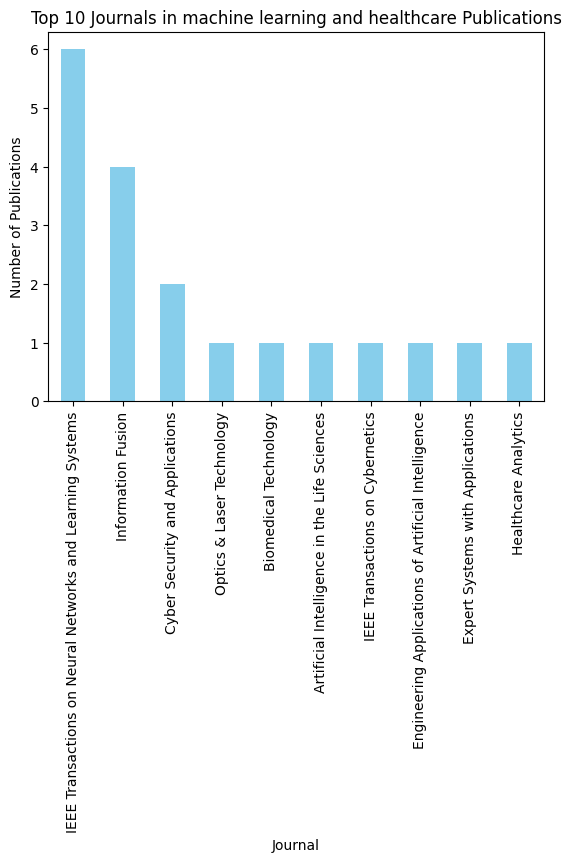

                                             Journal  Number of Publications
0  IEEE Transactions on Neural Networks and Learn...                       6
1                                 Information Fusion                       4
2                    Cyber Security and Applications                       2
3                          Optics & Laser Technology                       1
4                              Biomedical Technology                       1
5       Artificial Intelligence in the Life Sciences                       1
6                   IEEE Transactions on Cybernetics                       1
7  Engineering Applications of Artificial Intelli...                       1
8                   Expert Systems with Applications                       1
9                               Healthcare Analytics                       1
########################################  Publications Per Author  ########################################


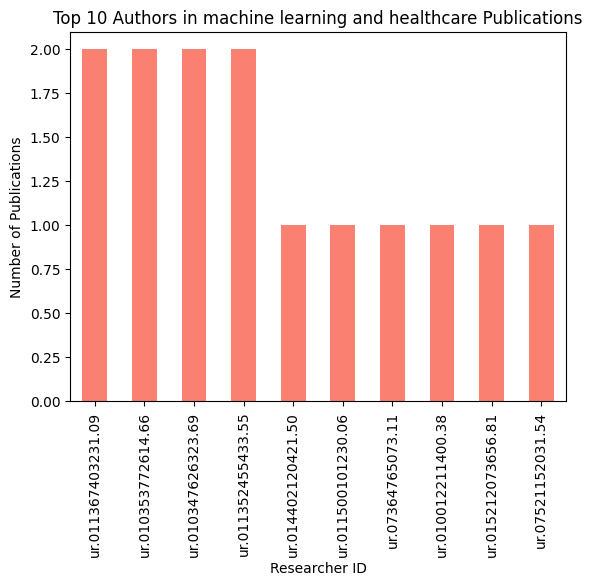

        Researcher ID  Number of Publications
0  ur.011367403231.09                       2
1  ur.010353772614.66                       2
2  ur.010347626323.69                       2
3  ur.011352455433.55                       2
4  ur.014402120421.50                       1
5  ur.011500101230.06                       1
6   ur.07364765073.11                       1
7  ur.010012211400.38                       1
8  ur.015212073656.81                       1
9   ur.07521152031.54                       1
########################################  Publications Per Country  ########################################


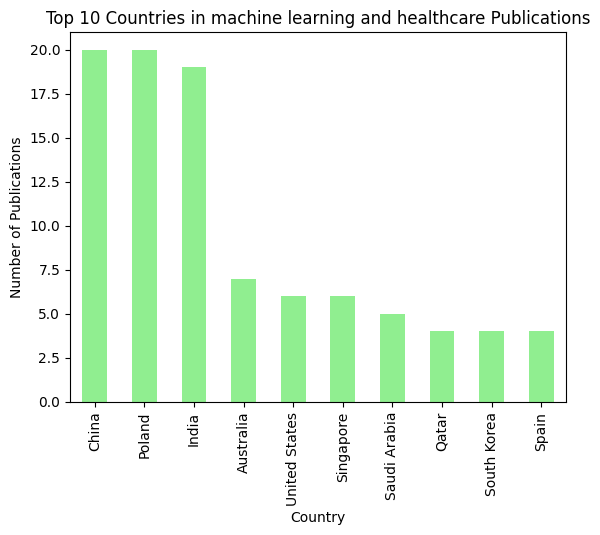

         Country  Number of Publications
0          China                      20
1         Poland                      20
2          India                      19
3      Australia                       7
4  United States                       6
5      Singapore                       6
6   Saudi Arabia                       5
7          Qatar                       4
8    South Korea                       4
9          Spain                       4
########################################  Publications Per Institutions  ########################################


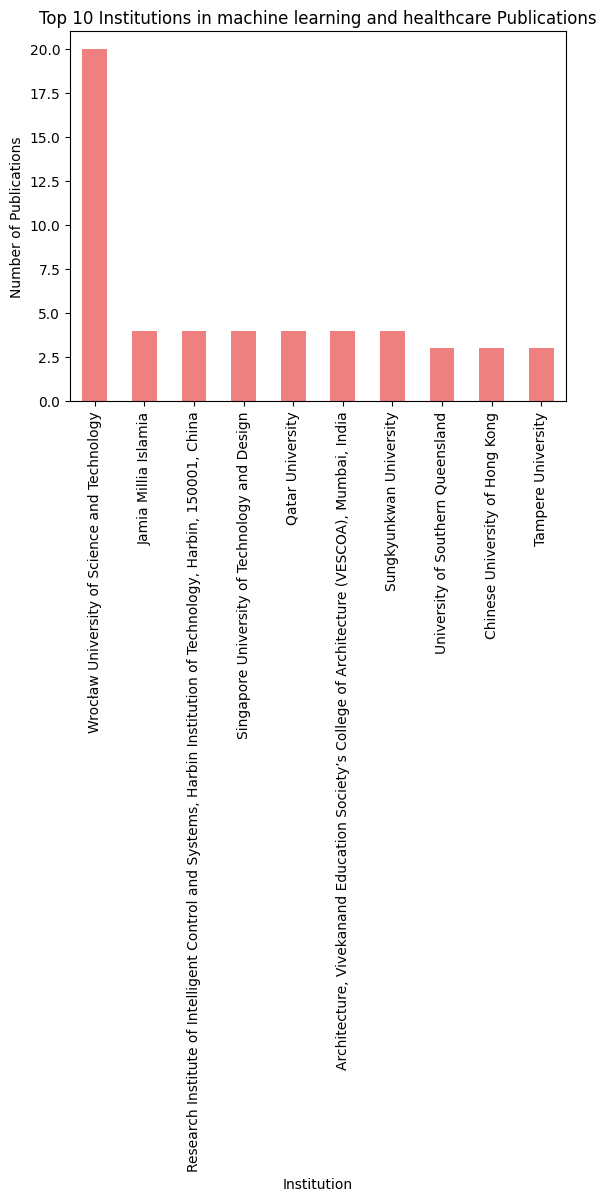

                                         Institution  Number of Publications
0       Wrocław University of Science and Technology                      20
1                               Jamia Millia Islamia                       4
2  Research Institute of Intelligent Control and ...                       4
3      Singapore University of Technology and Design                       4
4                                   Qatar University                       4
5  Architecture, Vivekanand Education Society’s C...                       4
6                            Sungkyunkwan University                       4
7                  University of Southern Queensland                       3
8                    Chinese University of Hong Kong                       3
9                                 Tampere University                       3


In [6]:
dimensions_query.analyze_results()